Problem Statement:
Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.
Abstract:
In the last few years, the number of for-hire vehicles operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more datacentric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After all, that set price is not a random guess.

# Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# LOAD AND REVIEW THE DATASET
df=pd.read_csv("TaxiFare.csv")

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.shape

(50000, 8)

In [5]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-02-11 13:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [10]:
df["dist"]=abs(df.longitude_of_pickup-df.longitude_of_dropoff)+abs(df.latitude_of_pickup-df.latitude_of_dropoff)
df
#EUCLIDEAN DISTANCE

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508


In [11]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dist                    0
dtype: int64

<AxesSubplot:>

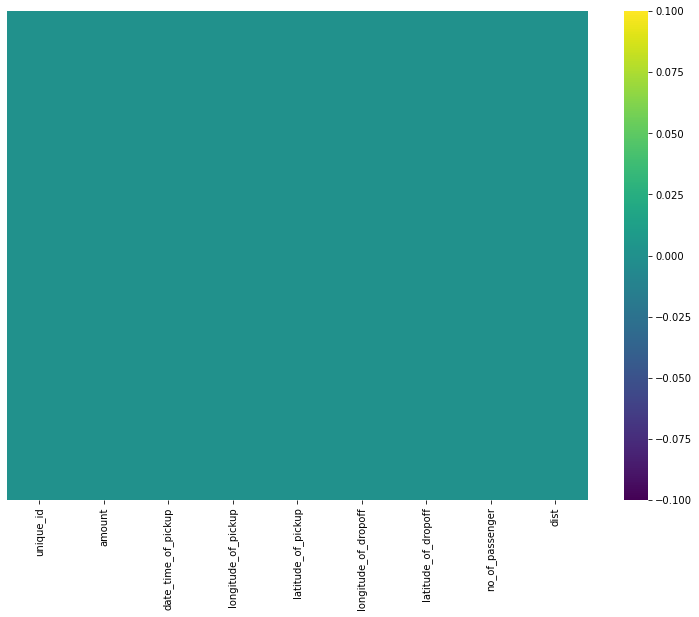

In [12]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

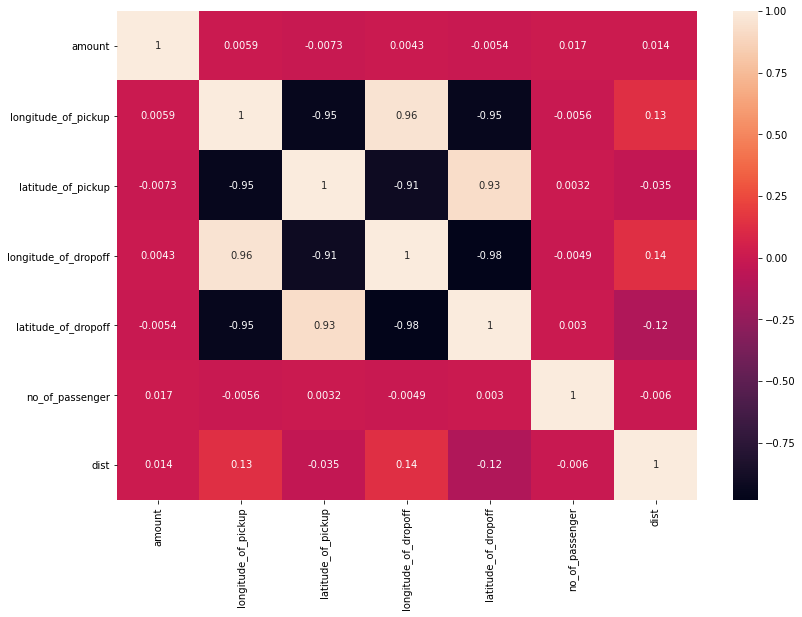

In [13]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.date_time_of_pickup

0        2009-06-15 17:26:21 UTC
1        2010-01-05 16:52:16 UTC
2        2011-08-18 00:35:00 UTC
3        2012-04-21 04:30:42 UTC
4        2010-03-09 07:51:00 UTC
                  ...           
49995    2013-06-12 23:25:15 UTC
49996    2015-06-22 17:19:18 UTC
49997    2011-01-30 04:53:00 UTC
49998    2012-11-06 07:09:00 UTC
49999    2010-01-13 08:13:14 UTC
Name: date_time_of_pickup, Length: 50000, dtype: object

In [15]:
day=[]
for i in df.date_time_of_pickup:
    day.append(pd.Timestamp((i.split()[0])+" "+(i.split()[1])).day_name())
df["Day"]=day
#GET THE DAY FROM THE TIMESTAMP

In [16]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday
...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday


In [17]:
day=[]
for i in df.date_time_of_pickup:
    l=i.split()[0].split("-")[2]
    day.append(int(l))
df["day_num"]=day
df
#GET THE DAY_NUM 

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9
...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday,6


In [18]:
timeofday=[]
for i in df.date_time_of_pickup:
    l=int(i.split()[1].split(":")[0])
    timeofday.append(l)
df['Session']=timeofday
df['Session'] = (df['Session'] + 4) // 4
df['Session'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
#GETTING ACCURATE SESSION

In [19]:
df.drop(["date_time_of_pickup","unique_id"],axis=1,inplace=True)
#DROPPING CERTAIN COLUMNS

In [20]:
df=df.drop(df[df.amount<=0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,0.009508,Tuesday,6,Early Morning


In [21]:
df=df.drop(df[df.dist==0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [22]:
df=df.drop(df[df.no_of_passenger==0].index)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [23]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist,Day,day_num,Session
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,Monday,15,Evening
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,Tuesday,5,Evening
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,Thursday,18,Late Night
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,Saturday,21,Early Morning
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,0.025552,Saturday,13,Evening
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.059464,Wednesday,12,Night
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.010223,Monday,22,Evening
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.024645,Sunday,30,Early Morning


In [24]:
df.drop(["longitude_of_pickup","longitude_of_dropoff","latitude_of_pickup","latitude_of_dropoff"], axis=1,inplace=True)
df

,amount,no_of_passenger,dist,Day,day_num,Session
0,4.5,1,0.011742,Monday,15,Evening
1,16.9,1,0.107481,Tuesday,5,Evening
2,5.7,2,0.019212,Thursday,18,Late Night
3,7.7,1,0.029386,Saturday,21,Early Morning
4,5.3,1,0.027194,Tuesday,9,Early Morning
...,...,...,...,...,...,...
49994,8.5,1,0.025552,Saturday,13,Evening
49995,15.0,1,0.059464,Wednesday,12,Night
49996,7.5,1,0.010223,Monday,22,Evening
49997,6.9,1,0.024645,Sunday,30,Early Morning


<AxesSubplot:>

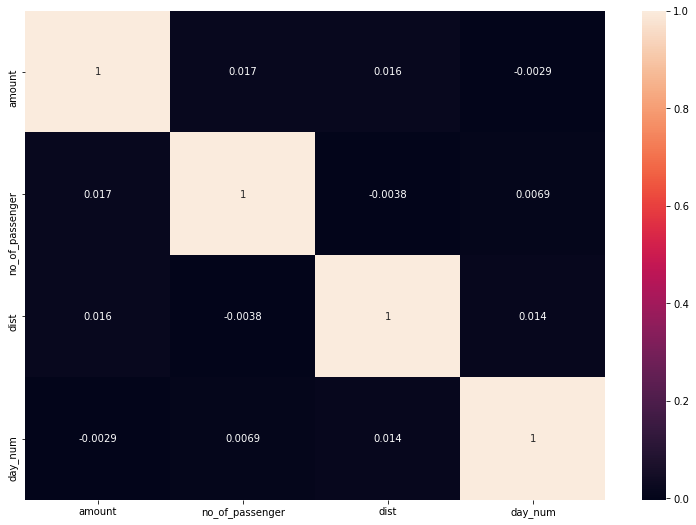

In [25]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)
#VISULAISATION OF CORRELATION USING HEATMAP

# ONE HOT ENCODING

In [26]:
df = pd.get_dummies(df, columns=['Session'],drop_first=True)
df.head()


,amount,no_of_passenger,dist,Day,day_num,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon
0,4.5,1,0.011742,Monday,15,1,0,0,0,0
1,16.9,1,0.107481,Tuesday,5,1,0,0,0,0
2,5.7,2,0.019212,Thursday,18,0,1,0,0,0
3,7.7,1,0.029386,Saturday,21,0,0,0,0,0
4,5.3,1,0.027194,Tuesday,9,0,0,0,0,0


In [27]:
df = pd.get_dummies(df, columns=['Day'],drop_first=True)
df.head()

,amount,no_of_passenger,dist,day_num,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,4.5,1,0.011742,15,1,0,0,0,0,1,0,0,0,0,0
1,16.9,1,0.107481,5,1,0,0,0,0,0,0,0,0,1,0
2,5.7,2,0.019212,18,0,1,0,0,0,0,0,0,1,0,0
3,7.7,1,0.029386,21,0,0,0,0,0,0,1,0,0,0,0
4,5.3,1,0.027194,9,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

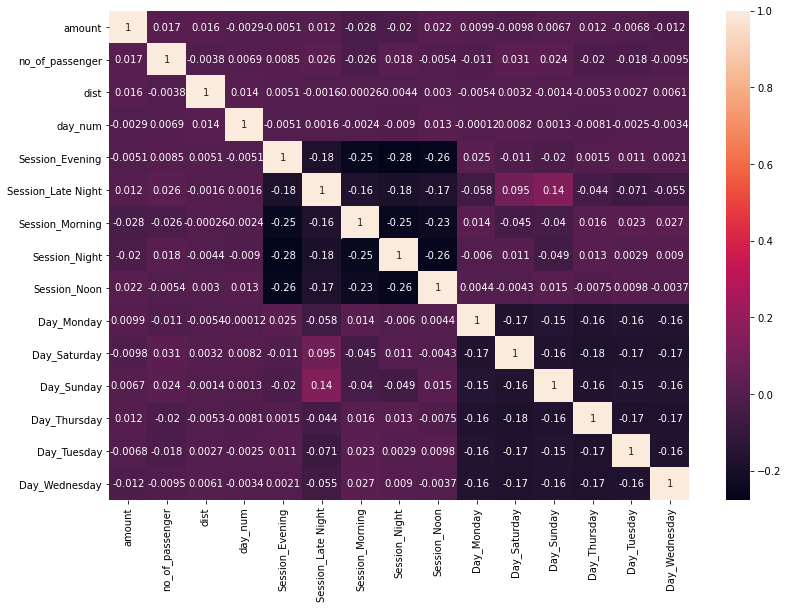

In [28]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

# Split the Data

In [29]:
X=df.drop("amount",axis=1)
y=df["amount"]

In [30]:
X

,no_of_passenger,dist,day_num,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,1,0.011742,15,1,0,0,0,0,1,0,0,0,0,0
1,1,0.107481,5,1,0,0,0,0,0,0,0,0,1,0
2,2,0.019212,18,0,1,0,0,0,0,0,0,1,0,0
3,1,0.029386,21,0,0,0,0,0,0,1,0,0,0,0
4,1,0.027194,9,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1,0.025552,13,1,0,0,0,0,0,1,0,0,0,0
49995,1,0.059464,12,0,0,0,1,0,0,0,0,0,0,1
49996,1,0.010223,22,1,0,0,0,0,1,0,0,0,0,0
49997,1,0.024645,30,0,0,0,0,0,0,0,1,0,0,0


In [31]:
y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49994     8.5
49995    15.0
49996     7.5
49997     6.9
49998     4.5
Name: amount, Length: 48380, dtype: float64

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [36]:
X_train

,no_of_passenger,dist,day_num,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
7393,2,0.029452,9,0,0,0,1,0,0,0,0,0,1,0
12094,1,0.011007,8,0,0,0,1,0,0,0,0,0,1,0
45689,1,0.062815,23,0,0,0,1,0,1,0,0,0,0,0
42062,1,0.028793,4,0,0,1,0,0,0,0,0,0,0,1
41059,1,0.081993,23,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21948,4,0.002362,15,0,0,0,1,0,0,0,1,0,0,0
47428,1,0.045030,30,0,0,1,0,0,0,0,0,1,0,0
44022,1,0.168104,25,0,0,1,0,0,0,0,1,0,0,0
45013,2,0.047121,16,0,0,0,0,0,0,0,0,0,0,0


In [37]:
X_test

,no_of_passenger,dist,day_num,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
9766,1,0.037058,10,0,0,0,1,0,1,0,0,0,0,0
13907,1,0.054730,19,0,0,0,1,0,1,0,0,0,0,0
42364,4,0.047713,5,0,1,0,0,0,0,1,0,0,0,0
31197,1,0.015507,7,0,0,0,1,0,0,0,0,1,0,0
18318,3,0.027489,12,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43703,3,0.025836,9,0,1,0,0,0,0,0,1,0,0,0
27997,1,0.019264,20,0,0,0,1,0,0,0,0,0,1,0
16889,1,0.022731,27,0,0,1,0,0,0,0,0,1,0,0
6442,1,0.009797,11,1,0,0,0,0,1,0,0,0,0,0


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression 
model= LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [45]:
model.score(X_train, y_train)

0.0035303131184877268

In [46]:
model.score(X_test, y_test)
#THE SCORE ISN'T GOOD

0.0029889462524902433

# Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.006451028558355776


In [48]:
print(poly_clf.score(X_test2, y_test))
#STILL THE SCORE ISN'T GOOD

-0.0007048464154133516


# Ridge

In [50]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.05, normalize=True)

In [53]:
pred = ridgeReg.predict(X_test)
ridgeReg.score(X_train,y_train)

0.0034185585641115512

In [54]:
ridgeReg.score(X_test,y_test)

0.002809542733976822

# Decision tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
dTree = DecisionTreeRegressor(random_state = 0,max_depth=7,min_samples_leaf=6)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
#GOT A MODERATE SCORE

0.7802953328975857
0.7518663135712721


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
# fit the regressor with x and y data

In [42]:
regressor.fit(X_train, y_train)
#Train data
regressor.score(X_train,y_train)*100

96.4293227868594

In [57]:
#Test Data
regressor.fit(X_test, y_test)
regressor.score(X_test,y_test)*100

96.25920436615625

# INFERENCE:

RANDOM FOREST MODEL GAVE THE GOOD SCORE WHEN COMPARED WITH OTHER MODELs.